In [1]:
#training the model
import os
from pathlib import Path
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2

# Set the path to the uploaded dataset
dataset_path = Path('Training')

# Define constants
img_size = (224, 224)
batch_size = 32
num_classes = 4 # italic, bold, underlined

# Load MobileNetV2 pre-trained on ImageNet as the base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model using the base model
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Data Augmentation and Image Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Set the validation split
)

# Load and prepare the training and validation datasets
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,  # You can adjust the number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)



2024-05-15 01:14:42.368651: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-15 01:14:43.489246: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-05-15 01:14:44.837555: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-05-15 01:14:44.837586: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: aditechbuddy-IdeaPad-Gaming-3-15ACH6
2024-05-15 01:14:44.837593: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: aditechbuddy-IdeaPad-Gaming-3-15ACH6
2024-05-15 01:14:44.837663: I tensorflow/compiler/xla/stream_executor/cuda/cuda

Found 4992 images belonging to 4 classes.
Found 1246 images belonging to 4 classes.
Epoch 1/10


2024-05-15 01:14:46.337934: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19267584 exceeds 10% of free system memory.
2024-05-15 01:14:48.118922: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19267584 exceeds 10% of free system memory.
2024-05-15 01:14:48.135333: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51380224 exceeds 10% of free system memory.
2024-05-15 01:14:48.168680: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51380224 exceeds 10% of free system memory.
2024-05-15 01:14:48.195972: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51380224 exceeds 10% of free system memory.


156/156 [==============================] - 122s 769ms/step - loss: 0.7110 - accuracy: 0.7153 - val_loss: 0.3340 - val_accuracy: 0.8824
Epoch 2/10
156/156 [==============================] - 122s 783ms/step - loss: 0.2942 - accuracy: 0.8974 - val_loss: 0.2414 - val_accuracy: 0.9161
Epoch 3/10
156/156 [==============================] - 128s 819ms/step - loss: 0.2269 - accuracy: 0.9233 - val_loss: 0.1557 - val_accuracy: 0.9391
Epoch 4/10
156/156 [==============================] - 124s 792ms/step - loss: 0.1783 - accuracy: 0.9431 - val_loss: 0.1854 - val_accuracy: 0.9301
Epoch 5/10
156/156 [==============================] - 117s 752ms/step - loss: 0.1522 - accuracy: 0.9503 - val_loss: 0.1321 - val_accuracy: 0.9515
Epoch 6/10
156/156 [==============================] - 114s 732ms/step - loss: 0.1344 - accuracy: 0.9569 - val_loss: 0.1523 - val_accuracy: 0.9474
Epoch 7/10
156/156 [==============================] - 112s 715ms/step - loss: 0.1312 - accuracy: 0.9569 - val_loss: 0.1534 - val_accura

In [2]:
# Load and prepare the training and validation datasets
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# The class indices are stored in the class_indices attribute of the generator
class_indices = train_generator.class_indices

print("Class Indices:", class_indices)


Found 4992 images belonging to 4 classes.
Class Indices: {'bold': 0, 'italic': 1, 'regular': 2, 'underlined': 3}


In [ ]:
# generating acccuracy for each font style
import numpy as np

# Function to get class labels from generator
def get_class_labels(generator):
    class_labels = []
    for i in range(len(generator.class_indices)):
        class_labels.append(list(generator.class_indices.keys())[i])
    return class_labels

# Test the model on the validation set
validation_generator.reset()
predictions = model.predict(validation_generator, steps=validation_generator.samples // batch_size, verbose=1)

# Get the true labels
true_labels = validation_generator.classes

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get the class labels
class_labels = get_class_labels(validation_generator)

# Print accuracy for each category
for label in class_labels:
    class_indices = np.where(true_labels == validation_generator.class_indices[label])[0]
    class_accuracy = np.sum(true_labels[class_indices] == predicted_labels[class_indices]) / len(class_indices)
    print(f'Accuracy for {label}: {class_accuracy * 100:.2f}%')

# Overall accuracy
overall_accuracy = np.sum(true_labels == predicted_labels) / len(true_labels)
print(f'Overall Accuracy: {overall_accuracy * 100:.2f}%')


In [8]:
# used to classify single image
from keras.preprocessing import image
import numpy as np
image_path = 'output.jpg'  # Replace with the path to your image

# Load and preprocess the image
img = image.load_img(image_path, target_size=img_size)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the image

# Make predictions
predictions = model.predict(img_array)

# Convert predictions to class labels
predicted_class = np.argmax(predictions)
class_labels =  ['bold', 'italic', 'regular', 'underlined']

# Print the predicted class label
print(f'The image is classified as: {class_labels[predicted_class]}')

predicted_class

1/1 [==============================] - 2s 2s/step
The image is classified as: underlined


3

In [151]:
# to save the test images in a folder containing single word
import os
from keras.preprocessing import image
import numpy as np

# Directory containing images
test_dir = 'new/new_bold'  # Replace with your directory
total_images = 0
bold_images = 0

# Image size
img_size = (224, 224)  # Replace with the size of your model's input images

# Class labels
class_labels = ['bold', 'italic', 'regular', 'underlined']

# Iterate over all images in the test directory
for filename in os.listdir(test_dir):
    if filename.endswith(".png") or filename.endswith(".jpg"): 
        # Construct the full image path
        image_path = os.path.join(test_dir, filename)
        
        # Load and preprocess the image
        img = image.load_img(image_path, target_size=img_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0  # Normalize the image

        # Make predictions
        predictions = model.predict(img_array)

        # Convert predictions to class labels
        predicted_class = np.argmax(predictions)
        
        total_images += 1
        if class_labels[predicted_class] == 'bold':
            bold_images += 1

        # Print the predicted class label
        print(f'The image {filename} is classified as: {class_labels[predicted_class]}')

percentage = (bold_images / total_images) * 100
print(f'Percentage of images classified as regular: {percentage}%')

1/1 [==============================] - 0s 74ms/step


The image AeroCrest_b.jpg is classified as: bold
1/1 [==============================] - 0s 69ms/step
The image AeroEclipse_b.jpg is classified as: bold
1/1 [==============================] - 0s 71ms/step
The image AeroFlow_b.jpg is classified as: bold
1/1 [==============================] - 0s 68ms/step
The image AeroLoom_b.jpg is classified as: bold
1/1 [==============================] - 0s 66ms/step
The image AeroNauticalExpress_b.jpg is classified as: bold
1/1 [==============================] - 0s 62ms/step
The image AeroQuest_b.jpg is classified as: bold
1/1 [==============================] - 0s 59ms/step
The image AeroSphere_b.jpg is classified as: bold
1/1 [==============================] - 0s 64ms/step
The image AeroStar_b.jpg is classified as: bold
1/1 [==============================] - 0s 62ms/step
The image AeroSwift_b.jpg is classified as: bold
1/1 [==============================] - 0s 65ms/step
The image AeroTraverseExpress_b.jpg is classified as: bold
1/1 [=================

In [38]:
from PIL import Image, ImageDraw
import pytesseract

def extract_words_as_images(image_path):
    img = Image.open(image_path)
    text_data = pytesseract.image_to_data(img, output_type=pytesseract.Output.DICT)

    # Create a drawing object
    draw = ImageDraw.Draw(img)

    for i, word in enumerate(text_data['text']):
        # Only consider non-empty and non-whitespace texts
        if word.strip() != '':
            x = text_data['left'][i]
            y = text_data['top'][i]
            w = text_data['width'][i]
            h = text_data['height'][i]

            # Draw bounding box around the word
            draw.rectangle([x, y, x + w, y + h], outline='red', width=2)

            # Crop each word and save as a separate image
            word_img = img.crop((x, y, x + w, y + h))
            word_img.save(f"word_{i}.png")

    # Save the image with bounding boxes
    img_with_boxes_path = f"{image_path}_with_boxes.jpg"
    img.save(img_with_boxes_path)
    print(f"Image with bounding boxes saved as: {img_with_boxes_path}")

# Replace 'path/to/your/image.jpg' with the actual path to your image file
image_path = 'multiwords/test5.jpg'
extract_words_as_images(image_path)


Image with bounding boxes saved as: multiwords/test5.jpg_with_boxes.jpg


1/1 [==============================] - 0s 21ms/step
The image is classified as: regular


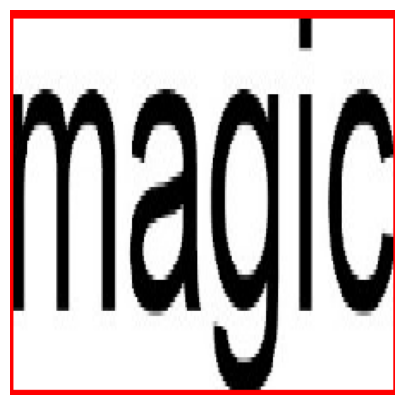

1/1 [==============================] - 0s 23ms/step
The image is classified as: bold


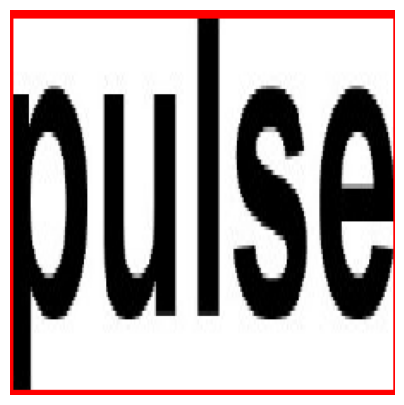

1/1 [==============================] - 0s 22ms/step
The image is classified as: bold


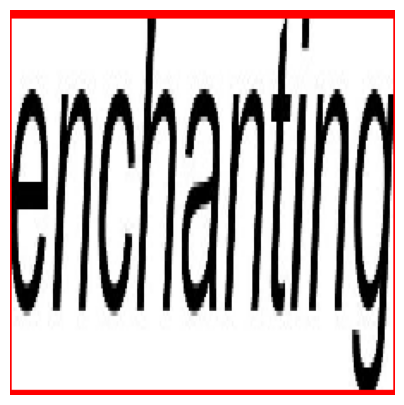

1/1 [==============================] - 0s 20ms/step
The image is classified as: underlined


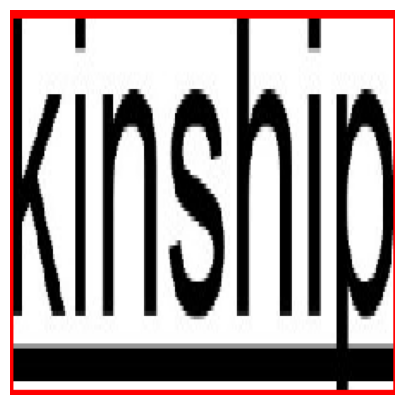

In [39]:
# now use all images of the sentence to classify each word about whether they are bold italic underlined or regular
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


#cheking italic 
# Path to the image you want to classify
for i in range(4,8):
    image_path = f'word_{i}.png'  # Replace with the path to your image

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image

    # Make predictions
    predictions = model.predict(img_array)

    # Convert predictions to class labels
    predicted_class = np.argmax(predictions)
    class_labels = ['bold', 'italic', 'regular', 'underlined']

    # Print the predicted class label
    print(f'The image is classified as: {class_labels[predicted_class]}')

    plt.figure(figsize=(5,5))

    plt.imshow(img)
    plt.axis('off')
    plt.show()